In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
tf.__version__

'1.8.0'

In [3]:
# parameters
number_clusters = 3
n_samples = 1000
learning_rate = 0.001
training_epochs = 20
noise = 0.8

In [4]:
# generate base 3 points
cluster_base_x = np.random.rand(number_clusters) * 15
cluster_base_y = np.random.rand(number_clusters) * 15

In [5]:
samples_x = []
samples_y = []
for cluster in range(number_clusters):
    print("generating samples for cluster ", cluster)
    for i in range(int(n_samples / 3)):
        samples_x.append(cluster_base_x[cluster] + np.random.randn() * noise)
        samples_y.append(cluster_base_y[cluster] + np.random.randn() * noise)

generating samples for cluster  0
generating samples for cluster  1
generating samples for cluster  2


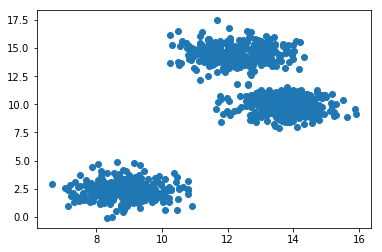

In [13]:
samples = [samples_x, samples_y]
plt.plot(samples[0], samples[1], "o")
points =np.transpose(samples)

In [7]:
X = tf.Variable(np.transpose(samples))

In [9]:
kmeans = tf.contrib.factorization.KMeansClustering(num_clusters=number_clusters, use_mini_batch=False)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp9x1f4pvm', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f0ced775470>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [18]:
def input_fn():
  return tf.train.limit_epochs(
      tf.convert_to_tensor(points, dtype=tf.float32), num_epochs=1)

num_iterations = 10
previous_centers = None
for _ in range(num_iterations):
  kmeans.train(input_fn)
  cluster_centers = kmeans.cluster_centers()
  print ('score:', kmeans.score(input_fn))


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp9x1f4pvm/model.ckpt-39
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 40 into /tmp/tmp9x1f4pvm/model.ckpt.
INFO:tensorflow:loss = 1230.6019, step = 40
INFO:tensorflow:Saving checkpoints for 41 into /tmp/tmp9x1f4pvm/model.ckpt.
INFO:tensorflow:Loss for final step: 1230.6019.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-28-21:23:10
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp9x1f4pvm/model.ckpt-41
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-04-28-21:23:10
INFO:tensorflow:Saving dict f

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-28-21:23:15
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp9x1f4pvm/model.ckpt-55
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-04-28-21:23:15
INFO:tensorflow:Saving dict for global step 55: global_step = 55, loss = 1230.6019, score = 1230.6019
score: 1230.6019
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp9x1f4pvm/model.ckpt-55
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 56 into /tmp/tmp9x1f4pvm/model.ckpt.
INFO:tensorflow:loss = 1230.6019, step = 56
INFO:tensorflow:Saving checkpoints for 57 into /tmp/tmp9x1f4pvm/mode

In [19]:
kmeans.cluster_centers()

array([[ 8.852446 ,  2.3418467],
       [13.6848135,  9.900317 ],
       [12.234351 , 14.547478 ]], dtype=float32)

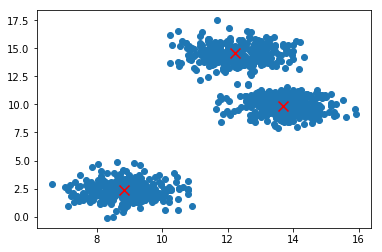

In [59]:
plt.scatter(samples[0], samples[1])
centroids = kmeans.cluster_centers()
plt.scatter([x[0] for x in centroids], [x[1] for x in centroids], marker="x", s=100, c="red")